In [1]:
# Import Library
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
import os

### Load Image data from .csv file

* `train-images-boxable.csv` file contains the image name and image url
* `train-annotations-bbox.csv` file contains the bounding box info with the image id (name) and the image label name
* `class-descriptions-boxable.csv` file contains the image label name corresponding to its class name

In [4]:
!wget https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv

--2021-05-14 11:03:05--  https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv
Resolving storage.googleapis.com... 2404:6800:4005:805::2010, 2404:6800:4005:810::2010, 2404:6800:4005:80d::2010, ...
Connecting to storage.googleapis.com|2404:6800:4005:805::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1194033454 (1,1G) [text/csv]
Saving to: ‘train-annotations-bbox.csv’

train-annotations-b 100%[===================>]   1,11G  4,25MB/s    in 4m 29s  

2021-05-14 11:07:35 (4,23 MB/s) - ‘train-annotations-bbox.csv’ saved [1194033454/1194033454]



In [5]:
!wget https://storage.googleapis.com/openimages/2018_04/train/train-images-boxable-with-rotation.csv

--2021-05-14 11:07:35--  https://storage.googleapis.com/openimages/2018_04/train/train-images-boxable-with-rotation.csv
Resolving storage.googleapis.com... 2404:6800:4005:805::2010, 2404:6800:4005:810::2010, 2404:6800:4005:80d::2010, ...
Connecting to storage.googleapis.com|2404:6800:4005:805::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 638407721 (609M) [text/csv]
Saving to: ‘train-images-boxable-with-rotation.csv’

train-images-boxabl 100%[===================>] 608,83M  4,28MB/s    in 2m 26s  

2021-05-14 11:10:02 (4,17 MB/s) - ‘train-images-boxable-with-rotation.csv’ saved [638407721/638407721]



In [6]:
!wget https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv

--2021-05-14 11:10:02--  https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv
Resolving storage.googleapis.com... 2404:6800:4005:810::2010, 2404:6800:4005:805::2010, 2404:6800:4005:800::2010, ...
Connecting to storage.googleapis.com|2404:6800:4005:810::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12011 (12K) [text/csv]
Saving to: ‘class-descriptions-boxable.csv’

class-descriptions- 100%[===================>]  11,73K  --.-KB/s    in 0,003s  

2021-05-14 11:10:02 (3,64 MB/s) - ‘class-descriptions-boxable.csv’ saved [12011/12011]



#### Move file to data folder

In [7]:
!mkdir data

In [2]:
data_path = 'data'
image_boxable_fname = 'train-images-boxable-with-rotation.csv'
annotations_bbox_fname = 'train-annotations-bbox.csv'
class_description_fname = 'class-descriptions-boxable.csv'
# os.rename(image_boxable_fname, os.path.join(data_path, image_boxable_fname))
# os.rename(annotations_bbox_fname, os.path.join(data_path, annotations_bbox_fname))
# os.rename(class_description_fname, os.path.join(data_path, class_description_fname))
image_boxable_fname = os.path.join(data_path, image_boxable_fname)
annotations_bbox_fname = os.path.join(data_path,annotations_bbox_fname)
class_description_fname = os.path.join(data_path, class_description_fname)

#### Open head each file

In [3]:
image_bboxable = pd.read_csv(image_boxable_fname)
image_bboxable.head()

,ImageID,Subset,OriginalURL,OriginalLandingURL,License,AuthorProfileURL,Author,Title,OriginalSize,OriginalMD5,Thumbnail300KURL,Rotation
0,4fa8054781a4c382,train,https://farm3.staticflickr.com/5310/5898076654...,https://www.flickr.com/photos/michael-beat/589...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/michael-beat/,Michael Beat,...die FNF-Kerze,4405052,KFukvivpCM5QXl5SqKe41g==,https://c1.staticflickr.com/6/5310/5898076654_...,0.0
1,b37f763ae67d0888,train,https://c1.staticflickr.com/1/67/197493648_628...,https://www.flickr.com/photos/drstarbuck/19749...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/drstarbuck/,Karen,Three boys on a hill,494555,9IzEn38GRNsVpATuv7gzEA==,https://c3.staticflickr.com/1/67/197493648_628...,0.0
2,7e8584b0f487cb9e,train,https://c7.staticflickr.com/8/7056/7143870979_...,https://www.flickr.com/photos/circasassy/71438...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/circasassy/,CircaSassy,A Christmas carol and The cricket on the heart...,2371584,3hQwu0iSzY1VIoXiwp0/Mg==,https://c7.staticflickr.com/8/7056/7143870979_...,0.0
3,86638230febe21c4,train,https://farm5.staticflickr.com/5128/5301868579...,https://www.flickr.com/photos/ajcreencia/53018...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/ajcreencia/,Alex,Abbey and Kenny,949267,onB+rCZnGQg5PRX7xOs18Q==,https://c4.staticflickr.com/6/5128/5301868579_...,NaN
4,249086e72671397d,train,https://c6.staticflickr.com/4/3930/15342460029...,https://www.flickr.com/photos/codnewsroom/1534...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/codnewsroom/,COD Newsroom,Suburban Law Enforcement Academy 20th Annivers...,6541758,MjpaAVbMAWbCusSaxI1D7w==,https://c1.staticflickr.com/4/3930/15342460029...,0.0


In [4]:
annotations_bbox = pd.read_csv(annotations_bbox_fname)
annotations_bbox.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0


In [5]:
class_description = pd.read_csv(class_description_fname,header = None)
class_description.head()

,0,1
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


### Plot Bounding box

In [6]:
def plot_bbox(img_id):
    img_url = image_bboxable.loc[image_bboxable['ImageID'] == img_id]['OriginalURL'].values[0]
    img = io.imread(img_url)
    height, width, channel = img.shape
    print(f'image shape: {img.shape}')
    bbox = annotations_bbox[annotations_bbox['ImageID'] == img_id]
    for idx, value in bbox.iterrows():
        x1 = int(value['XMin'] * width)
        x2 = int(value['XMax'] * width)
        y1 = int(value['YMin'] * height)
        y2 = int(value['YMax'] * height)
        label_code = value['LabelName']
        class_series = class_description[class_description[0] == label_code]
        label_name = class_series[1].values[0]
        print(f'Coordinate: {x1, y1}, {x2, y2}',' ', f'Class: {label_name}')
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img,label_name,(x1, y1 -10), font, 1, (0,0,255),2)
    plt.figure(figsize = (15, 10))
    plt.title('Image with Bounding Box')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

image shape: (640, 640, 3)
Coordinate: (8, 95), (124, 376)   Class: Person
Coordinate: (16, 457), (177, 607)   Class: Person
Coordinate: (96, 126), (198, 378)   Class: Person
Coordinate: (164, 417), (275, 592)   Class: Person
Coordinate: (164, 151), (222, 247)   Class: Person
Coordinate: (204, 167), (236, 210)   Class: Person
Coordinate: (264, 76), (604, 304)   Class: Person
Coordinate: (338, 432), (590, 617)   Class: Dairy Product
Coordinate: (40, 569), (315, 636)   Class: Table
Coordinate: (192, 296), (634, 380)   Class: Table
Coordinate: (200, 224), (370, 297)   Class: Table
Coordinate: (335, 428), (594, 628)   Class: Cake
Coordinate: (336, 424), (589, 624)   Class: Pastry


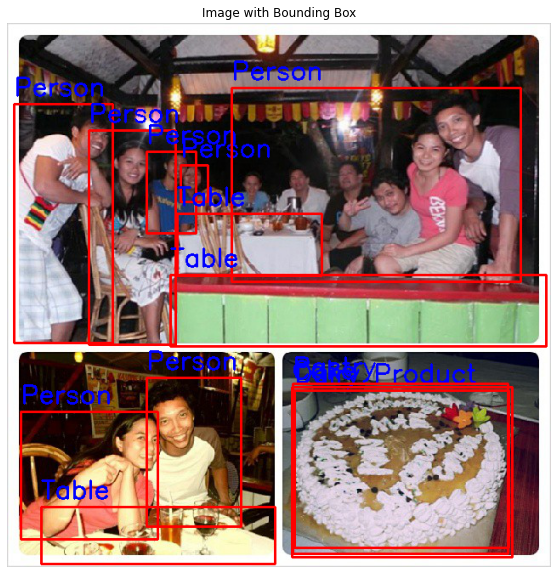

In [58]:
plot_bbox('000002b66c9c498e')

## Download data

In [7]:
class_description.loc[class_description[1].isin(['Person','Mobile phone', 'Car'])]

,0,1
68,/m/01g317,Person
312,/m/050k8,Mobile phone
570,/m/0k4j,Car


In [8]:
person_data = class_description.loc[class_description[1] =='Person']
phone_data=class_description.loc[class_description[1] == 'Mobile phone']
car_data= class_description.loc[class_description[1] == 'Car']

person_data

,0,1
68,/m/01g317,Person


In [9]:
person_code = person_data[0].values[0]
phone_code = phone_data[0].values[0]
car_code = car_data[0].values[0]
## -->
person_code

'/m/01g317'

**Because several images have somw object**

In [10]:
person_bbox = annotations_bbox.loc[annotations_bbox['LabelName']== person_code]
phone_bbox = annotations_bbox.loc[annotations_bbox['LabelName'] == phone_code]
car_bbox = annotations_bbox.loc[annotations_bbox['LabelName'] == car_code]

person_bbox

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14610053,ffff22d9d07ff188,xclick,/m/01g317,1,0.625000,0.836250,0.185000,0.998333,1,1,0,1,0
14610054,ffff22d9d07ff188,xclick,/m/01g317,1,0.780000,0.998750,0.180000,0.996667,1,1,0,1,0
14610084,ffff59df073e186d,xclick,/m/01g317,1,0.026144,0.160131,0.704248,0.918301,1,0,0,1,0
14610135,ffff83c6a0e1c6c0,xclick,/m/01g317,1,0.689375,0.960625,0.119167,0.645000,0,0,0,0,0


In [11]:
print(f'there are {person_bbox.shape[0]} persons in the datasets')
print(f'there are {phone_bbox.shape[0]} phones in the datasets')
print(f'there are {car_bbox.shape[0]} cars in the datasets')

there are 1034721 persons in the datasets
there are 6365 phones in the datasets
there are 248075 cars in the datasets


In [12]:
person_img_id = person_bbox['ImageID']
phone_img_id = phone_bbox['ImageID']
car_img_id = car_bbox['ImageID']
person_img_id =np.unique(person_img_id)
phone_img_id = np.unique(phone_img_id)
car_img_id = np.unique(car_img_id)
print(f'there are {person_img_id.shape[0]} images which contain persons')
print(f'there are {phone_img_id.shape[0]} images which contain phones')
print(f'there are {car_img_id.shape[0]} images which contain cars')

there are 248384 images which contain persons
there are 4312 images which contain phones
there are 89465 images which contain cars


**Random data to choose 500 images of each label to download**

In [89]:
import random
n = 500
sample_person_imgid = random.sample(list(person_img_id), n)
sample_phone_imgid = random.sample(list(phone_img_id), n)
sample_car_imgid = random.sample(list(car_img_id),n)


In [92]:
sample_person_data = image_bboxable[image_bboxable['ImageID'].isin(sample_person_imgid)]
sample_phone_data = image_bboxable[image_bboxable['ImageID'].isin(sample_phone_imgid)]
sample_car_data = image_bboxable[image_bboxable['ImageID'].isin(sample_car_imgid)]
## --> example of sample data
sample_person_data.head()

,ImageID,Subset,OriginalURL,OriginalLandingURL,License,AuthorProfileURL,Author,Title,OriginalSize,OriginalMD5,Thumbnail300KURL,Rotation
2822,a81414e46c1d5496,train,https://farm7.staticflickr.com/3205/2410170326...,https://www.flickr.com/photos/backpackerben/24...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/backpackerben/,Benedict Adam,brasil three 054,1186781,MBXxgGxNJfdg0+WEV6hi9Q==,https://c8.staticflickr.com/4/3205/2410170326_...,0.0
3001,9f3bbb596ace9f54,train,https://farm5.staticflickr.com/2945/1546199735...,https://www.flickr.com/photos/unb_agencia/1546...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/unb_agencia/,UnB Agência,O Plantae,9431419,OobAkaJLlfsFF9aPKxzLPA==,https://c4.staticflickr.com/3/2945/15461997352...,0.0
8330,a8cd1d012c299ec4,train,https://farm5.staticflickr.com/7283/1693791443...,https://www.flickr.com/photos/armysmdc/1693791...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/armysmdc/,U.S. Army Space and Missile Defense Command (S...,DSC_0285,1518573,G7DPYXXWPTAy/xVQAgmDUw==,https://c2.staticflickr.com/8/7283/16937914435...,0.0
9068,83045c89542cb849,train,https://c2.staticflickr.com/1/35/72486305_699b...,https://www.flickr.com/photos/elsie/72486305/,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/elsie/,Les Chatfield,Daleks at Modelworld19,97016,1T8BQqTZC0T+KbJieNOExw==,https://c1.staticflickr.com/1/35/72486305_699b...,0.0
10940,fbb22fd1a3493c6b,train,https://c4.staticflickr.com/3/2689/4468888342_...,https://www.flickr.com/photos/gogovisual/44688...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/gogovisual/,GOGO Visual,Taddy Blazusiak P3274999-e,1064781,ypyu3/2MgYWOPjx487Kywg==,https://c1.staticflickr.com/3/2689/4468888342_...,0.0


**Get basic information of data to the dict**

In [99]:
sample_person_dict = sample_person_data[['ImageID', 'OriginalURL']].set_index('ImageID')['OriginalURL'].to_dict()
sample_phone_dict = sample_phone_data[['ImageID', 'OriginalURL']].set_index('ImageID')['OriginalURL'].to_dict()
sample_car_dict = sample_car_data[['ImageID', 'OriginalURL']].set_index('ImageID')['OriginalURL'].to_dict()
## -- example of sample dict
sample_person_dict ## ImageID is the index of dict and OriginalUrl is the value
# use [OrigialURL to remove this name in the dict]

{'a81414e46c1d5496': 'https://farm7.staticflickr.com/3205/2410170326_29c0baa309_o.jpg',
 '9f3bbb596ace9f54': 'https://farm5.staticflickr.com/2945/15461997352_1116608701_o.jpg',
 'a8cd1d012c299ec4': 'https://farm5.staticflickr.com/7283/16937914435_19d7bd15d7_o.jpg',
 '83045c89542cb849': 'https://c2.staticflickr.com/1/35/72486305_699bd9ea33_o.jpg',
 'fbb22fd1a3493c6b': 'https://c4.staticflickr.com/3/2689/4468888342_777e935f3f_o.jpg',
 '9d92ea422ad23027': 'https://farm8.staticflickr.com/4152/5054149518_d98cdd53da_o.jpg',
 '364f6de2f47b42e7': 'https://farm8.staticflickr.com/7432/12949703533_2911013c1d_o.jpg',
 'bb552091fe251860': 'https://farm1.staticflickr.com/3345/3608932068_6eec92e8b5_o.jpg',
 'aba5abb67153a75a': 'https://c3.staticflickr.com/4/3842/15101769330_0e48941141_o.jpg',
 'db16fae8280f65ed': 'https://c6.staticflickr.com/6/5483/10853151013_3b94627b99_o.jpg',
 '669eb233cac9cc75': 'https://farm6.staticflickr.com/4139/4874088679_e40bdceedb_o.jpg',
 '9e12b0961d5e7a75': 'https://farm6

In [100]:
# mapping dict for the loop of each class
mapping = [sample_person_dict, sample_phone_dict, sample_car_dict]
classes = ['Person','Mobile phone', 'Car']

**Now download the data**

In [104]:
for idx, label_name in enumerate (classes):
    n_issues = 0 
    # Crete the directory if the directory is not exist
    class_path = os.path.join(data_path, label_name)
    if not os.path.exists(class_path):
        os.mkdir(class_path)
    for img_id, img_url in mapping[idx].items():
        try:
            img = io.imread(img_url)
            img_path = os.path.join(class_path,img_id + '.jpg')
            io.imsave(img_path,img)
        except Exception as e:
            n_issues += 1
    print(f'{label_name} have {n_issues} images issues')

/home/hnm942/anaconda3/envs/fast-rcnn/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1176 bytes but only got 288. Skipping tag 37500
  warnings.warn(


Person have 34 images issues


/home/hnm942/anaconda3/envs/fast-rcnn/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 20 bytes but only got 12. Skipping tag 36868
  warnings.warn(


Mobile phone have 64 images issues
Car have 36 images issues


**Train test split**

In [105]:
random.seed(1)

In [107]:
train_path = os.path.join(data_path,'train')
test_path = os.path.join(data_path, 'test')
if not os.path.exists(train_path):
    os.mkdir(train_path)
if not os.path.exists(test_path):
    os.mkdir(test_path)

In [109]:
from shutil import copyfile

In [113]:
for idx in range (len(classes)):
    # link address of class name folder to list direction to connect all file in folder
    path = os.path.join(data_path,classes[idx])
    all_imgs = os.listdir(path)
    all_imgs = [f for f in all_imgs if not f.startswith('.')]
    random.shuffle(all_imgs)
    len_train_size =int( n * 0.7)
    train_imgs = all_imgs[:len_train_size]
    test_imgs = all_imgs[len_train_size :]
    # Copy each image to the train folder
    for i in range (len(train_imgs)):
        original_path = os.path.join(path, train_imgs[i])
        new_path = os.path.join(train_path, train_imgs[i])
        copyfile(original_path, new_path)
    # Copy each image to the test folder    
    for j in range (len(test_imgs)):
        original_path = os.path.join(path, test_imgs[j])
        new_path = os.path.join(test_path, test_imgs[j])
        copyfile(original_path, new_path)        

In [117]:
print(f'Train folder contains {len(os.listdir(train_path))} images')
print(f'Test folder contains {len(os.listdir(test_path))} images')

Train folder contains 1138 images
Test folder contains 316 images


**Filtering several duplicated images**

Because there are a lot of feature in 3 .csv file and we need care 5 features of bbox in that 

In [119]:
import sys

In [140]:
class_code = [person_code, phone_code, car_code]
train_df = pd.DataFrame(columns = ['FileName', 'XMin', 'XMax','YMin','YMax','ClassName'])
train_imgs = os.listdir(train_path)
train_imgs = [f for f in train_imgs if not f.startswith('.')]
for idx in range (len(train_imgs)):
    sys.stdout.write('Prase train_imgs: ' + str(idx) + '; Number pf boxes: ' + str(len(train_df)) + '\r')
    sys.stdout.flush()
    img_fname = train_imgs[idx]
    img_id = img_fname[:16]
    tmp_df = annotations_bbox[annotations_bbox['ImageID'] == img_id]
    for index, row in tmp_df.iterrows():
        label_code = row['LabelName']
        for i in range (len(class_code)):
            if label_code == class_code[i]:
                train_df = train_df.append({'FileName': img_fname,'XMin': row['XMin'],'XMax': row['XMax'], 'YMin': row['YMin'],
                                            'YMax': row['YMax'], 'ClassName': classes[i]}, ignore_index = True)

In [141]:
test_df = pd.DataFrame(columns = ['FileName', 'XMin', 'XMax','YMin','YMax','ClassName'])
test_imgs = os.listdir(test_path)
test_imgs = [f for f in test_imgs if not f.startswith('.')]
for idx in range (len(test_imgs)):
    sys.stdout.write('Prase test_imgs: ' + str(idx) + '; Number pf boxes: ' + str(len(test_df)) + '\r')
    sys.stdout.flush()
    img_fname = test_imgs[idx]
    img_id = img_fname[:16]
    tmp_df = annotations_bbox[annotations_bbox['ImageID'] == img_id]
    for index, row in tmp_df.iterrows():
        label_code = row['LabelName']
        for i in range (len(class_code)):
            if label_code == class_code[i]:
                test_df = test_df.append({'FileName': img_fname,'XMin': row['XMin'],'XMax': row['XMax'], 'YMin': row['YMin'],
                                            'YMax': row['YMax'], 'ClassName': classes[i]}, ignore_index = True)

In [142]:
prep_path = os.path.join(data_path, 'preprocessing')
if not os.path.exists(prep_path):
    os.mkdir(prep_path)
train_df.to_csv(os.path.join(prep_path,'train.csv'))
test_df.to_csv(os.path.join(prep_path,'test.csv'))


**Try to read data from train path**

In [143]:
data = pd.read_csv(os.path.join(prep_path,'train.csv'))
data

,Unnamed: 0,FileName,XMin,XMax,YMin,YMax,ClassName
0,0,1b110d9829d71491.jpg,0.146250,0.983125,0.075833,0.999167,Person
1,1,1b110d9829d71491.jpg,0.835625,0.999375,0.000000,0.999167,Person
2,2,95f9d4325de66926.jpg,0.000000,0.039844,0.669792,0.770833,Car
3,3,95f9d4325de66926.jpg,0.004688,0.149219,0.656250,0.781250,Car
4,4,95f9d4325de66926.jpg,0.055469,0.499219,0.643750,0.826042,Car
...,...,...,...,...,...,...,...
3733,3733,f7ba7450bf82b16e.jpg,0.945000,0.963125,0.620000,0.675000,Person
3734,3734,f7ba7450bf82b16e.jpg,0.964375,0.985000,0.609167,0.685000,Person
3735,3735,f7ba7450bf82b16e.jpg,0.972500,0.999375,0.642500,0.871667,Person
3736,3736,2a1a83dfbcfd8cbb.jpg,0.361667,0.712500,0.100000,0.645000,Person


<function matplotlib.pyplot.show(close=None, block=None)>

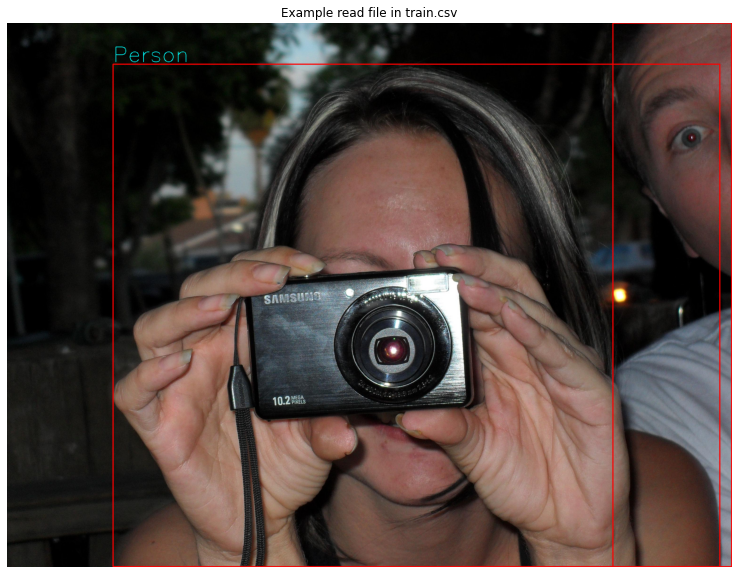

In [164]:
# Considering a first name picture
img_fname = data['FileName'][0]
img_data = data.loc[data['FileName'] == img_fname]
img = io.imread(os.path.join(train_path, img_fname))
height, width, channel = img.shape
for i, value in img_data.iterrows():
    label = value['ClassName']
    x1 = int(value['XMin'] * width)
    x2 = int(value['XMax'] * width)
    y1 = int(value['YMin'] * height)
    y2 = int(value['YMax'] * height)
    cv2.rectangle(img,(x1, y1), (x2, y2),(255, 0, 0), 3)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img,label,(x1, y1 - 10), font, 3, (0,255,255), 2)
plt.figure(figsize = (15, 10))
plt.title('Example read file in train.csv')
plt.imshow(img)
plt.axis('off')
plt.show
